#  Использование одномерных сверток в PyTorch

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html
* https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.html#torch.nn.MaxPool1d
* https://wandb.ai/wandb_fc/wb-tutorials/reports/Tutorial-Text-Classification-Using-CNNs--Vmlldzo0NTIxNDI5
* https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

## Задачи для совместного разбора

1\. Изучите принцип работы одномерных сверточных слоев в `torch`

![1d conv](https://raw.githubusercontent.com/krzjoa/krzjoa.github.io/master/assets/img/2020-10-03-ts-and-torch-1/conv1d.gif)

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
X = th.randint(0, 10, size=(10, 1, 6)).float()
X.shape

torch.Size([10, 1, 6])

In [ ]:
X

tensor([[[6., 7., 6., 8., 5., 8.]],

        [[9., 7., 7., 7., 3., 2.]],

        [[6., 4., 9., 4., 4., 4.]],

        [[2., 6., 8., 5., 9., 5.]],

        [[0., 0., 0., 0., 7., 6.]],

        [[7., 2., 0., 2., 0., 9.]],

        [[7., 9., 0., 5., 9., 4.]],

        [[5., 8., 6., 1., 6., 9.]],

        [[0., 6., 1., 5., 1., 3.]],

        [[2., 0., 0., 2., 3., 5.]]])

In [ ]:
conv = nn.Conv1d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    bias=False,
)

In [ ]:
out = conv(X)
out.shape

torch.Size([10, 1, 4])

In [ ]:
conv.weight, conv.weight.shape

(Parameter containing:
 tensor([[[0.3803, 0.2847, 0.3917]]], requires_grad=True),
 torch.Size([1, 1, 3]))

In [ ]:
X

tensor([[[7., 4., 3., 0., 9., 7.]],

        [[8., 9., 2., 8., 0., 1.]],

        [[8., 4., 0., 7., 8., 2.]],

        [[6., 1., 4., 9., 2., 2.]],

        [[4., 5., 4., 1., 3., 0.]],

        [[0., 0., 4., 6., 6., 9.]],

        [[0., 6., 7., 2., 5., 2.]],

        [[6., 3., 1., 5., 9., 7.]],

        [[7., 0., 0., 4., 7., 9.]],

        [[3., 8., 8., 9., 2., 5.]]])

In [ ]:
X[0, 0, 0:3] @ conv.weight[0][0]

tensor(4.9759, grad_fn=<DotBackward0>)

In [ ]:
out

tensor([[[4.9759, 2.3752, 4.6665, 5.3042]],

        [[6.3879, 7.1259, 3.0380, 3.4341]],

        [[4.1810, 4.2633, 5.1266, 5.7229]],

        [[4.1334, 5.0446, 4.8667, 4.7755]],

        [[4.5115, 3.4319, 2.9811, 1.2343]],

        [[1.5669, 3.4891, 5.5796, 7.5154]],

        [[4.4502, 5.0579, 5.1901, 2.9674]],

        [[3.5275, 3.3842, 5.3293, 7.2057]],

        [[2.6620, 1.5669, 3.8808, 7.0395]],

        [[6.5521, 8.8453, 6.3879, 5.9507]]], grad_fn=<ConvolutionBackward0>)

![conv1d](https://api.wandb.ai/files/wandb_fc/images/projects/37754834/1f7be456.gif)

In [33]:
conv = nn.Conv1d(in_channels=4, out_channels=1, kernel_size=2)

In [34]:
conv.weight.shape

torch.Size([1, 4, 2])

In [35]:
batch_size = 16
embedding_dim = 4
seq_len = 6
X = th.rand(batch_size, embedding_dim, seq_len)

In [37]:
X.shape

torch.Size([16, 4, 6])

In [39]:
X

tensor([[[0.7910, 0.8364, 0.4221, 0.1094, 0.1352, 0.6370],
         [0.0268, 0.7549, 0.3358, 0.2027, 0.8520, 0.0668],
         [0.7544, 0.8825, 0.5266, 0.5900, 0.6135, 0.6336],
         [0.8777, 0.5371, 0.0567, 0.3428, 0.1610, 0.3454]],

        [[0.1503, 0.3557, 0.5965, 0.3795, 0.0657, 0.4616],
         [0.0096, 0.9978, 0.5240, 0.7948, 0.4952, 0.5292],
         [0.1418, 0.7182, 0.3260, 0.0058, 0.3820, 0.6101],
         [0.2848, 0.6021, 0.3648, 0.2883, 0.8004, 0.1650]],

        [[0.4412, 0.3950, 0.8450, 0.0115, 0.2216, 0.1319],
         [0.5740, 0.2066, 0.7740, 0.7812, 0.9231, 0.4801],
         [0.6296, 0.2229, 0.2549, 0.8546, 0.1130, 0.9115],
         [0.5697, 0.8053, 0.5967, 0.6651, 0.5497, 0.3813]],

        [[0.0973, 0.5993, 0.9413, 0.4073, 0.1170, 0.8405],
         [0.5111, 0.5815, 0.5524, 0.1959, 0.0285, 0.7774],
         [0.3896, 0.7772, 0.4238, 0.2304, 0.0268, 0.4628],
         [0.2987, 0.6733, 0.6573, 0.1980, 0.3525, 0.3127]],

        [[0.5089, 0.3716, 0.8700, 0.3905, 0.1282

In [38]:
out = conv(X)
out.shape

torch.Size([16, 1, 5])

In [ ]:
conv2 = nn.Conv2d(in_channels=4, out_channels=1, kernel_size=(1,2))
conv2.weight.shape

torch.Size([1, 4, 1, 2])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите данные из файла `ts.csv`. Используя модель, состоящую из одного одномерного сверточного слоя, решите задачу предсказания $y_t$ по `k` предыдущим точкам временного ряда $x_{t-k}...x_{t-1}$. Исследуйте значения $k\in[1, 7]$. Для каждого $k$ выведите на экран итоговое значение функции потерь и веса ядра свертки. Визуализируйте исходный временной ряд и полученные прогнозы.

- [x] Проверено на семинаре

In [1]:
import pandas as pd
import torch as th
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ts.csv')
df

,x,y
0,-2.103694,-1.156378
1,-1.081334,0.008044
2,17.530135,-4.130848
3,16.535054,-3.007267
4,20.868080,2.944139
...,...,...
1000,2.968320,20.707556
1001,3.323458,5.306192
1002,14.302680,-2.922816
1003,23.734496,1.263861


In [3]:
X = th.tensor(df['x'], dtype=th.float32).reshape(1,1,-1)
X.shape

torch.Size([1, 1, 1005])

In [4]:
X

tensor([[[-2.1037, -1.0813, 17.5301,  ..., 14.3027, 23.7345, 24.0985]]])

In [5]:
k = 3

model = nn.Sequential(
    nn.Conv1d(1,1,k)
)

model(X)[:,:,:-1].shape

torch.Size([1, 1, 1002])

In [6]:
model[0].weight.data@X[0,0,:3] + model[0].bias.data

tensor([[0.2925]])

In [ ]:
# models = [nn.Sequential(nn.Conv1d(1,1,k)) for k in range(1,8)]
# ys = [th.tensor(df['y'].iloc[k:].values, dtype=th.float32) for k in range(1,8)]
# models

In [7]:
models = [nn.Conv1d(1,1,k) for k in range(1,8)]
ys = [th.tensor(df['y'].iloc[k:].values, dtype=th.float32) for k in range(1,8)]
models

[Conv1d(1, 1, kernel_size=(1,), stride=(1,)),
 Conv1d(1, 1, kernel_size=(2,), stride=(1,)),
 Conv1d(1, 1, kernel_size=(3,), stride=(1,)),
 Conv1d(1, 1, kernel_size=(4,), stride=(1,)),
 Conv1d(1, 1, kernel_size=(5,), stride=(1,)),
 Conv1d(1, 1, kernel_size=(6,), stride=(1,)),
 Conv1d(1, 1, kernel_size=(7,), stride=(1,))]

In [11]:
models[0].weight

Parameter containing:
tensor([[[-0.9251]]], requires_grad=True)

In [13]:
models[0](X)[:,:,:-1]

tensor([[[  2.1607,   1.2150, -16.0022,  ...,  -2.8598, -13.0166, -21.7418]]],
       grad_fn=<SliceBackward0>)

In [14]:
y_all = th.tensor(df['y'].values, dtype=th.float32)
for model, y in zip(models,ys):
  n_epochs = 500
  lr = 0.001

  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=lr)

  for epoch in range(n_epochs):

    y_pred = model(X)[:,:,:-1] # убираем предсказание для последних x
    loss = criterion(y_pred.flatten(), y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  y_pred = model(X)[:,:,:-1]
  print(model)
  print(criterion(y_pred.flatten(), y))
  print(model.weight)
  print()

Conv1d(1, 1, kernel_size=(1,), stride=(1,))
tensor(1022.6703, grad_fn=<MseLossBackward0>)
Parameter containing:
tensor([[[-0.4710]]], requires_grad=True)

Conv1d(1, 1, kernel_size=(2,), stride=(1,))
tensor(19.0353, grad_fn=<MseLossBackward0>)
Parameter containing:
tensor([[[ 0.5435, -0.1401]]], requires_grad=True)

Conv1d(1, 1, kernel_size=(3,), stride=(1,))
tensor(35.5406, grad_fn=<MseLossBackward0>)
Parameter containing:
tensor([[[ 0.0412,  0.6611, -0.3188]]], requires_grad=True)

Conv1d(1, 1, kernel_size=(4,), stride=(1,))
tensor(29.7824, grad_fn=<MseLossBackward0>)
Parameter containing:
tensor([[[-0.2324,  0.5505,  0.0741, -0.0576]]], requires_grad=True)

Conv1d(1, 1, kernel_size=(5,), stride=(1,))
tensor(2.0450, grad_fn=<MseLossBackward0>)
Parameter containing:
tensor([[[ 0.0278, -0.0933, -0.0188,  0.3170,  0.1562]]], requires_grad=True)

Conv1d(1, 1, kernel_size=(6,), stride=(1,))
tensor(0.9523, grad_fn=<MseLossBackward0>)
Parameter containing:
tensor([[[ 0.0096,  0.0868, -0.2148

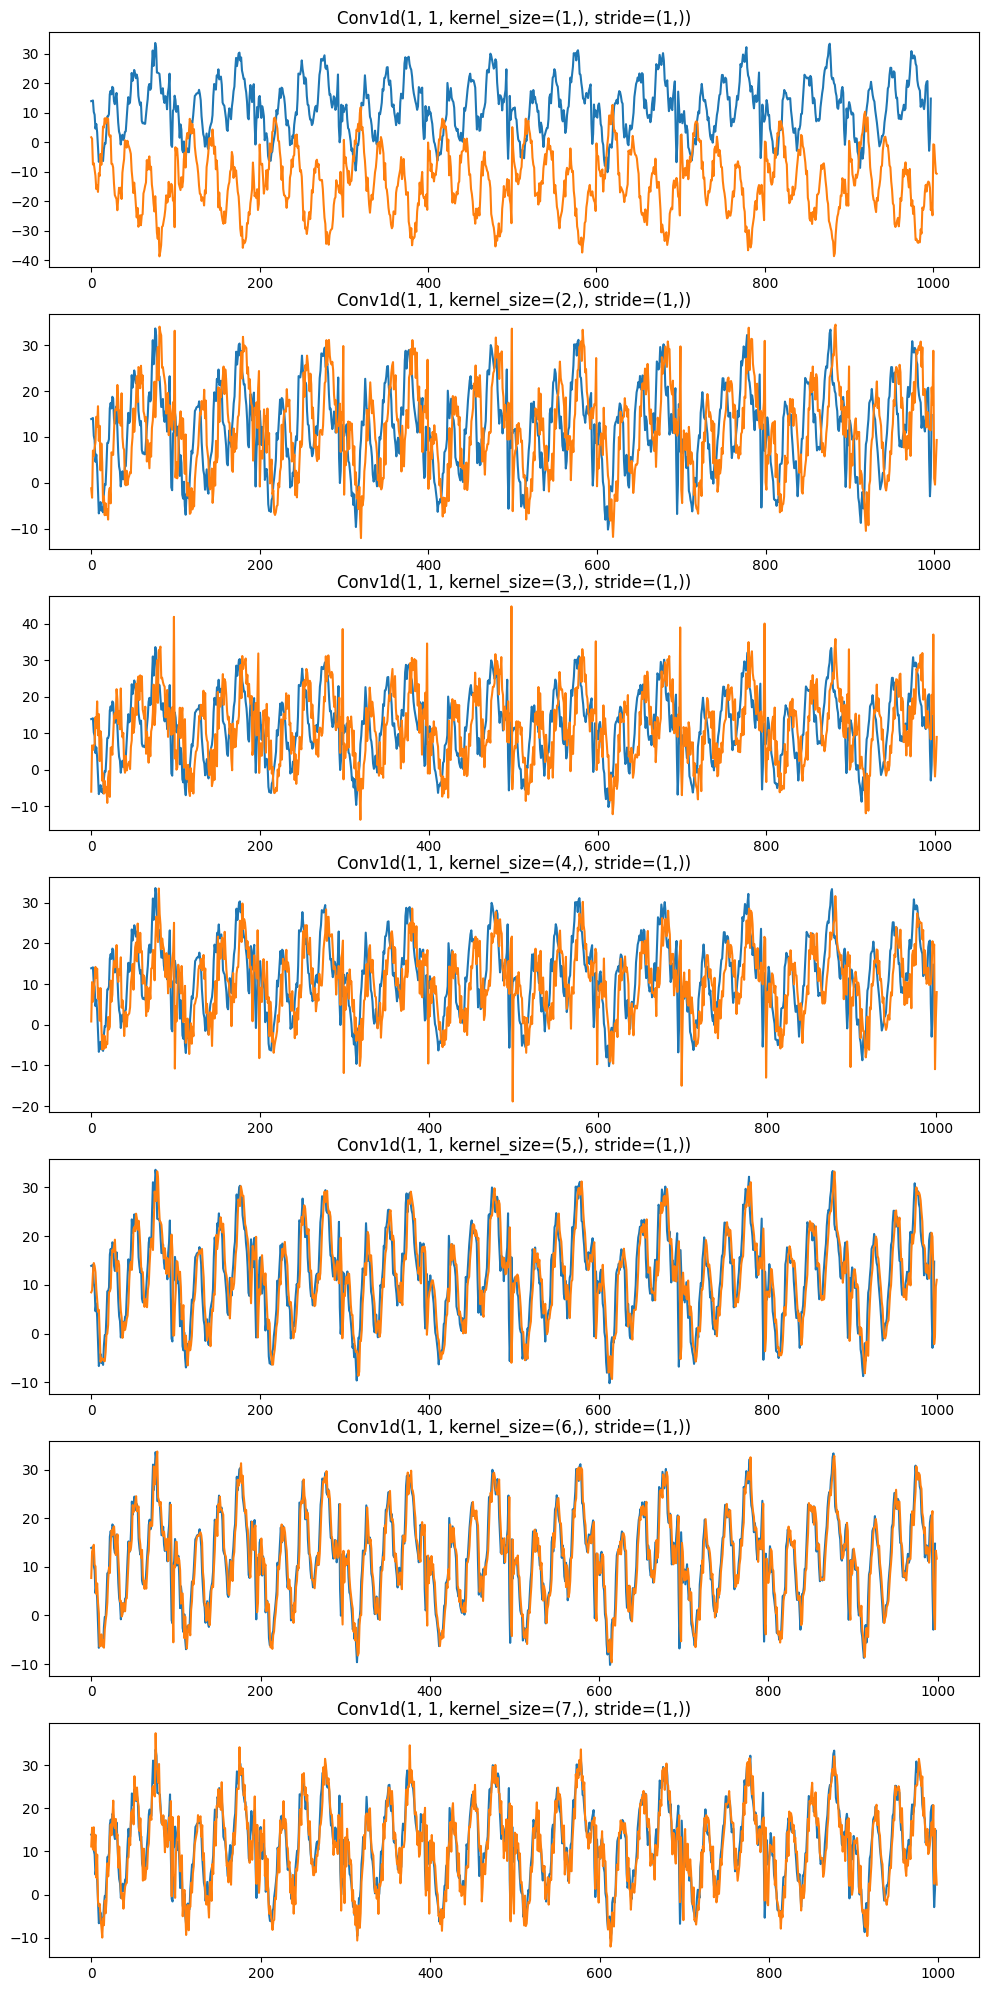

In [16]:
fig = plt.figure(figsize=(12,25))
for i, md in enumerate(models):
  y_pred = md(X)
  fig.add_subplot(7,1,i+1)
  plt.plot(y)
  plt.plot(y_pred.flatten().detach().numpy())
  plt.title(md)

<p class="task" id="2"></p>

2\. Загрузите файл `PV_Elec_Gas2.csv`. Опишите класс `ElectricityDataset`, который разбивает данные на окна в соответствии со следующей схемой:

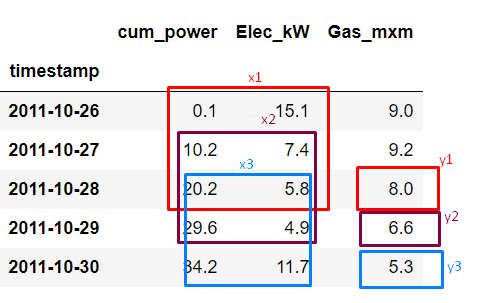

Разбейте набор данных на обучающую и тестовую выборку. Для теста оставьте данные за 2019 год.

- [ ] Проверено на семинаре

In [96]:
df2 = pd.read_csv('/content/PV_Elec_Gas2.csv', parse_dates=[0])
df2 = df2.rename(columns={df2.columns[0] : 'timestamp'})
df2 = df2.set_index('timestamp')
df2.head()

,cum_power,Elec_kW,Gas_mxm
timestamp,,,
2011-10-26,0.1,15.1,9.0
2011-10-27,10.2,7.4,9.2
2011-10-28,20.2,5.8,8.0
2011-10-29,29.6,4.9,6.6
2011-10-30,34.2,11.7,5.3


In [97]:
df2.dtypes

cum_power    float64
Elec_kW      float64
Gas_mxm      float64
dtype: object

In [98]:
from torch.utils.data import Dataset

In [105]:
class ElectricityDataset(Dataset):
  def __init__(self, df, y, window_size=3):
    self.indexes = df.index
    self.data = th.tensor(df.values, dtype=th.float32)
    self.y = th.tensor(y.values, dtype=th.float32)
    self.window_size = window_size

  def __len__(self):
    return len(self.data) - self.window_size + 1

  def __getitem__(self, idx):
    return self.data[idx:idx+self.window_size], self.y[idx+self.window_size-1]

In [106]:
ED = ElectricityDataset(df2[['cum_power', 'Elec_kW']], df2['Gas_mxm'])
ED[0]

(tensor([[ 0.1000, 15.1000],
         [10.2000,  7.4000],
         [20.2000,  5.8000]]),
 tensor(8.))

In [113]:
df2_train = df2[df2.index < pd.to_datetime('2019-01-01')]
df2_test = df2[df2.index >= pd.to_datetime('2019-01-01')]

train_dset = ElectricityDataset(df2_train[['cum_power', 'Elec_kW']], df2_train['Gas_mxm'])
test_dset = ElectricityDataset(df2_test[['cum_power', 'Elec_kW']], df2_test['Gas_mxm'])
len(train_dset), len(test_dset)

(2622, 322)

<p class="task" id="3"></p>

3\. Решите задачу предсказания столбца `Gas_mxm` на основе столбцов `cum_power` и `Elec_kW` с использованием одномерных сверток. Для оптимизации используйте мини-пакетный градиентный спуск с использованием `DataLoader`. Обратите внимание, что при создании `DataLoader` вы не можете перемешивать данные.

Постройте график изменения значения функции потерь на обучающем и тестовом множестве в зависимости от номера эпохи. Визуализируйте на одном графике прогнозы модели и предсказываемый временной ряд.

- [ ] Проверено на семинаре

In [114]:
from torch.utils.data import DataLoader

In [168]:
class ConvNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=16):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=in_channels, out_channels=out_channels, kernel_size=2)
        self.fc1 = nn.Linear(in_features=out_channels, out_features=1)

    def forward(self, x):
        out = self.conv1(x)
        out = th.relu(out)
        out = self.fc1(out.view(out.size(0), -1))
        return out

In [288]:
batch_size = 64
train_loader = DataLoader(train_dset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dset, batch_size=len(test_dset), shuffle=False)

in_channels = 3
out_channels = 16
model1 = ConvNet(in_channels, out_channels)

criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
  model1.train()
  cur_loss = 0
  for data, labels in train_loader:
    optimizer.zero_grad()
    outputs = model1(data)
    loss = criterion(outputs.flatten(), labels)
    cur_loss += loss.item()
    loss.backward()
    optimizer.step()

  train_losses.append(cur_loss)

  model1.eval()
  for data, labels in test_loader:
    test_outputs = model1(data)
    test_loss = criterion(test_outputs.flatten(), labels)
    test_losses.append(test_loss.item())

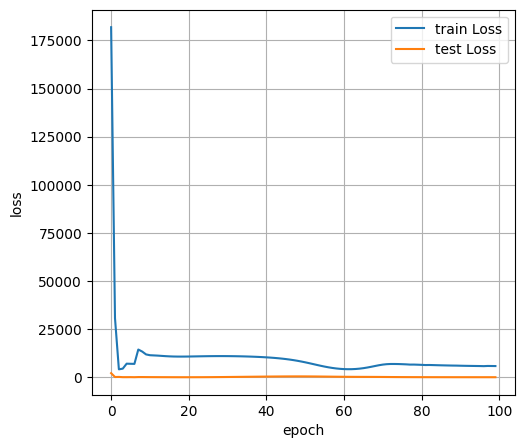

In [289]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train Loss')
plt.plot(test_losses, label='test Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()

In [290]:
test_losses[-1]

20.497343063354492

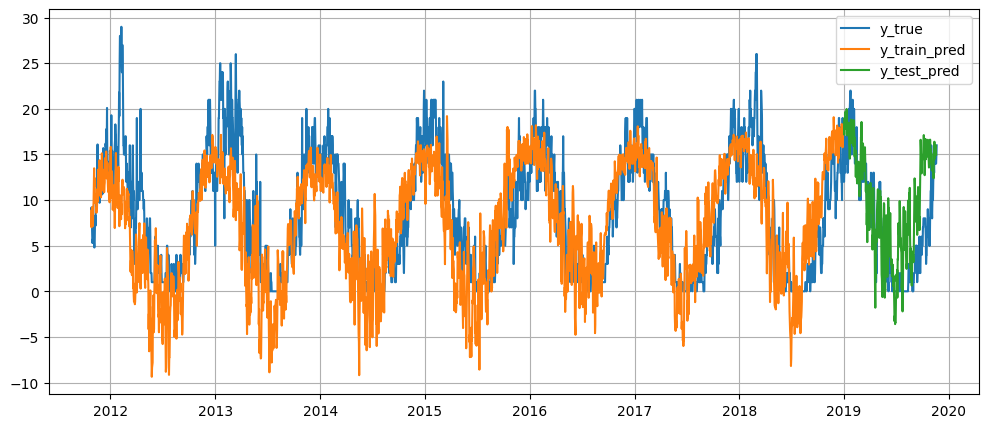

In [291]:
for data, labels in DataLoader(train_dset, batch_size=len(train_dset), shuffle=False):
  y_train_pred = model1(data)

for data, labels in DataLoader(test_dset, batch_size=len(test_dset), shuffle=False):
  y_test_pred = model1(data)

plt.figure(figsize=(12, 5))
plt.plot(df2['Gas_mxm'], label='y_true')
plt.plot(df2_train.index[:-2], y_train_pred.detach().numpy().flatten(), label='y_train_pred')
plt.plot(df2_test.index[:-2], y_test_pred.detach().numpy().flatten(), label='y_test_pred')
plt.legend()
plt.grid()

<p class="task" id="4"></p>

4\. Считайте файлы `polarity/positive_reviews.csv` (положительные обзоры на фильмы) и `polarity/negative_reviews.csv` (отрицательные обозоры на фильмы) и разбейте на обучающую и тестовую выборку. Выполните предобработку текста и создайте Vocab на основе обучающей выборки (токен - слово). Выведите на экран количество токенов в полученном словаре.

Создайте класс `PolarityDataset` и реализуйте метод `__getitem__` таким образом, чтобы он возвращал набор индексов токенов (слов) для текста и метки классов для этих текстов. Создайте два объекта класса `PolarityDataset` для обучающей и тестовой выборки. Выведите на экраны количество элементов и распределение данных по классам в каждом из них.

- [ ] Проверено на семинаре

In [ ]:
from torch.utils.data import Dataset

class PolarityDataset(Dataset):
    pass

<p class="task" id="5"></p>

5\. Решите задачу классификации текстов обзоров с использованием одномерных сверток. Для преобразования последовательности индексов в последовательность векторов используйте слой `nn.Embedding`. Обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`. Выведите на экран отчет по классификации для обучающей и тестовой выборки после завершения процесса обучения. Добейтесь accuracy на тестовой выборке не менее 70%.

- [ ] Проверено на семинаре

<p class="task" id="6"></p>

6\. Придумайте небольшой отзыв, прогоните его через модель и выведите метку предсказанного класса (позитивный или негативный). Сделайте это для явно позитивного и явно негативного отзыва.

- [ ] Проверено на семинаре

## Обратная связь
- [ ] Хочу получить обратную связь по решению